# Digital marketing and Python - The basics

## Digital Marketing and Data Science

Python can easily perform complex data manipulations, such as regression analysis, market basket research, prediction, cluster analysis, customer segmentation and much more, which are common in marketing analytics. Using specific libraries, you can access your data from Google Analytics, Web Logs, and many more marketing-related software, helping bring all your data into one place for more thorough analysis.

For a lot of marketing analysis, you will be dealing with average sized data sets and not necessarily the Big Data size that is usually associated with data science. Although data science skills aren’t necessary to be a digital marketer, they will help you analyse and better understand the data so that you can make data-driven business decisions that will improve your marketing methods and therefore improve performance. They will help you rely less on tools. 

To find out more about data science in marketing check out:

- https://www.ama.org/publications/MarketingNews/Pages/data-science-latest-in-demand-skill-marketing.aspx
- https://lab.getapp.com/marketing-analytics-data-analysis-in-marketing/
- DATACAMP's Marketing classes. Most of these notebooks are based on these tutorials

## Standard Data Exploration

The purpose of this first notebook is to introduce you to a typical marketing dataset and demonstrate that the techniques you already know apply here as well. 

We load example sales data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

salesdata = pd.read_csv("salesData.csv")
salesdata.describe()

,id,nItems,nCats,nBrands,nPurch,salesLast3Mon,salesThisMon,daysSinceLastPurch,meanItemPrice,meanShoppingCartValue,customerDuration
count,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000,5122.000000
mean,2740.341468,186.269426,36.358649,81.915072,19.877587,1322.604492,605.846193,6.277235,12.253981,91.810634,644.078485
std,1573.603725,136.885007,13.357449,48.013472,12.545377,370.696876,184.196839,8.926092,16.403479,61.891531,151.560904
min,1.000000,1.000000,1.000000,1.000000,1.000000,188.990000,0.000000,1.000000,1.866555,17.351562,0.000000
25%,1381.250000,83.000000,27.000000,45.000000,11.000000,1067.300000,480.982500,2.000000,6.016695,54.429474,547.000000
50%,2742.500000,157.000000,37.000000,75.500000,17.000000,1332.135000,607.810000,3.000000,8.529072,76.565747,649.000000
75%,4098.750000,258.000000,47.000000,111.000000,26.000000,1573.530000,731.535000,7.000000,13.185741,110.610227,745.000000
max,5455.000000,1469.000000,73.000000,517.000000,88.000000,2790.580000,1362.780000,89.000000,377.900000,914.040000,1355.000000


salesData is about customers and their sales in the last three months. Otherwise:

- id: identification number of customer
- mostFreqStore: store person bought mostly from
- mostFreqCat: category person purchased mostly
- nCats: number of different categories
- preferredBrand: brand person purchased mostly
- nBrands: number of different brands

Next we want to visualise the correlation in the dataset. Do you remember .corr() ?

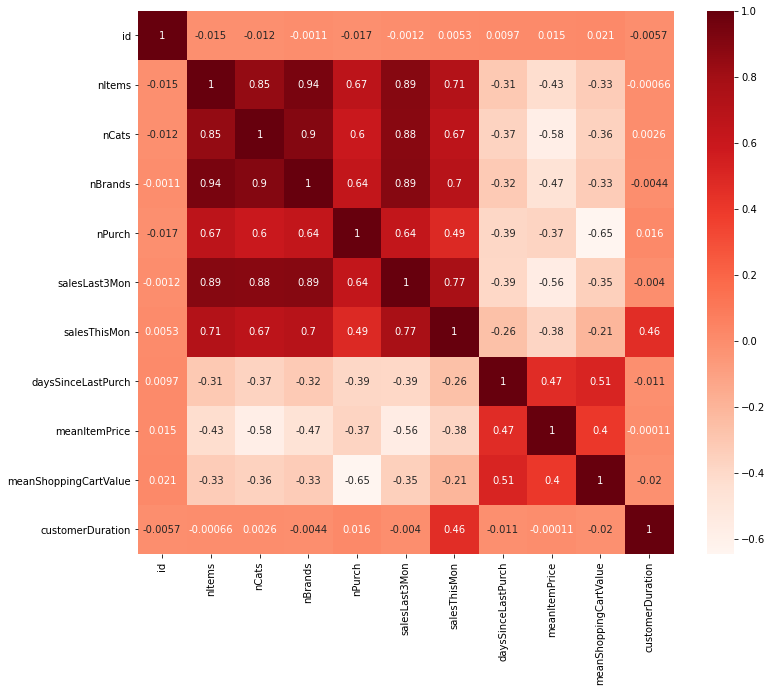

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = salesdata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The following boxplots show how salesThisMon is dependent on the preferredBrand and mostFreqStore.

<AxesSubplot:xlabel='mostFreqStore', ylabel='salesThisMon'>

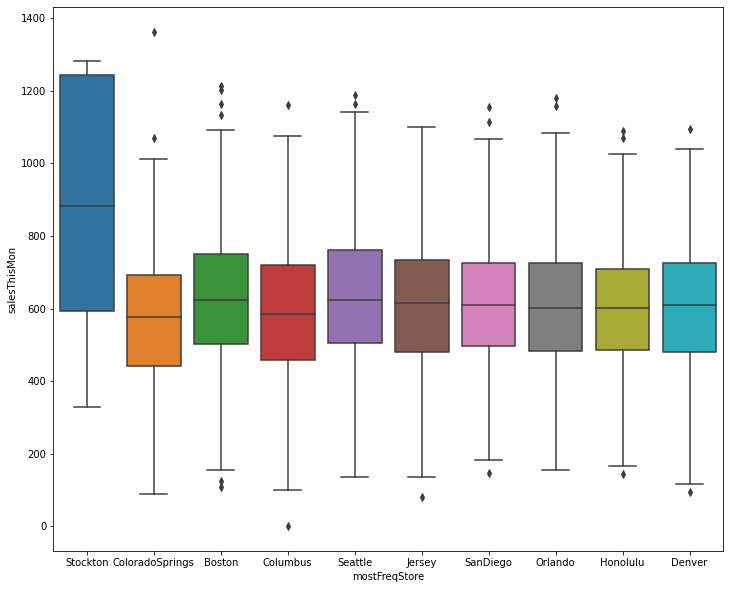

In [3]:
plt.figure(figsize=(12,10))
sns.boxplot(x=salesdata['mostFreqStore'], y=salesdata['salesThisMon'])

<AxesSubplot:xlabel='preferredBrand', ylabel='salesThisMon'>

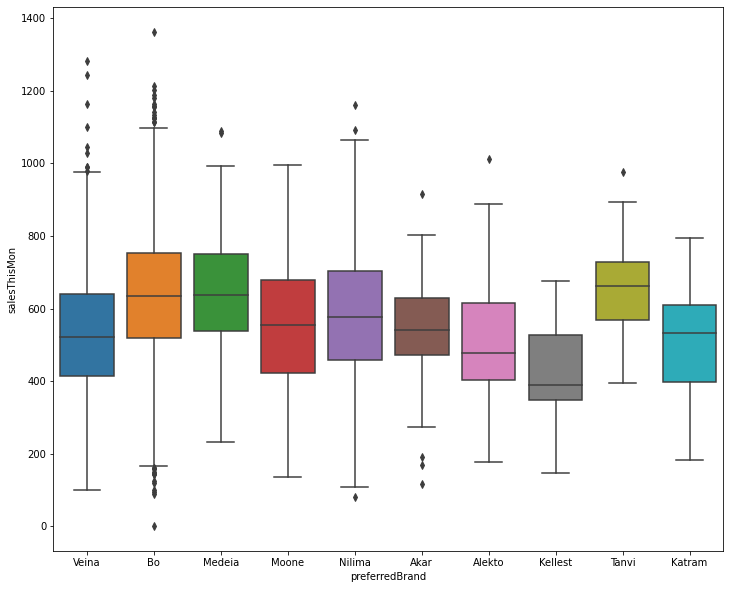

In [4]:
plt.figure(figsize=(12,10))
sns.boxplot(x=salesdata['preferredBrand'], y=salesdata['salesThisMon'])

Which features are  well suited to explain the sales of this month?

There seems to be definitely something about the Stockton store, while for the brands the situation seems to be much less obvious.

As a final exercise, let's check out a quick linear regression analysis. We would like to investigate further the relationships of days since last purchase.

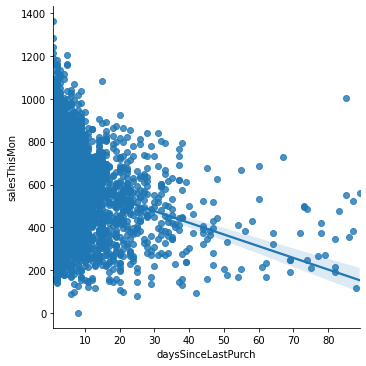

In [5]:
sns.lmplot(data=salesdata, x='daysSinceLastPurch' , y='salesThisMon')

There is obviously a negative relationship between the days since the last purchase and the sales this months. 

Let's control for brand next.

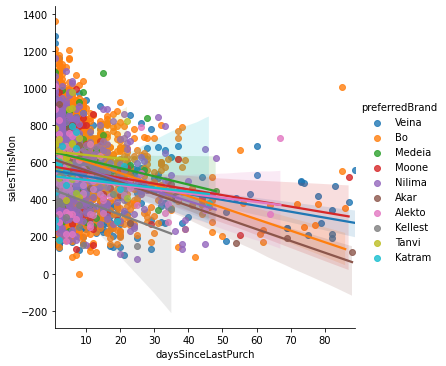

In [6]:
sns.lmplot(data=salesdata, x='daysSinceLastPurch' , y='salesThisMon', hue='preferredBrand')

As you can see, for some brands, the time delay effect is less strong.
    

I hope you can  see how the methods we have used in the module can easily be applied to digital marketing data. Next we will investigate several examples of specific digital marketing analysis.